In [ ]:
!wget 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip'

--2022-06-14 18:05:18--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.60.72.32, 2600:1409:3000:490::e59, 2600:1409:3000:4a4::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.60.72.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   100MB/s    in 7.8s    

2022-06-14 18:05:26 (101 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
!unzip /content/kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [ ]:
REBUILD_DATA = True
 
    
class Dvc():
    IMG_SIZE = 50
    CATS = 'PetImages/Cat'
    DOGS = 'PetImages/Dog'
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for file in tqdm(os.listdir(label)):
                try:
                    # print(label)
                    path = os.path.join(label, file)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    pass
            
            np.random.shuffle(self.training_data)
            np.save('training_data.npy', self.training_data)
            print("cat: ", self.catcount)
            print("dog: ", self.dogcount)
            

if REBUILD_DATA:
    dogvcat = Dvc()
    dogvcat.make_training_data()

PetImages/Cat


100%|██████████| 12501/12501 [00:13<00:00, 913.55it/s]
/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


cat:  12476
dog:  0
PetImages/Dog


100%|██████████| 12501/12501 [00:13<00:00, 913.28it/s]


cat:  12476
dog:  12470


In [ ]:
td = np.load("training_data.npy",allow_pickle = True)

In [197]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 32, 5)
        self.conv3 = nn.Conv2d(32, 32, 5)
        self.pool1 = nn.MaxPool2d((2, 2))
        self.pool2 = nn.MaxPool2d((2, 2))
        self.pool3 = nn.MaxPool2d((2, 2))
        self.fc1 = nn.Linear(512, 512)
        self.fc2 = nn.Linear(512, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = x.flatten(start_dim=1) # print(x.shape) to put the value in self.fc1()
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)
        

In [198]:
net = Net().cuda()

simple

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss = nn.MSELoss()

X = torch.Tensor([i[0] for i in td]).view(-1, 50, 50)
X = X/255.0 # rescaling image

y = torch.Tensor([i[1] for i in td])

val_percent = 0.1
val_size = int(len(X)*0.1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  


In [ ]:
train_x = X[:-val_size]
train_y = y[:-val_size]

test_x = X[-val_size:]
test_y  = y[-val_size:]

In [ ]:
BATCH_SIZE = 100
EPOCHS = 7

for epoch in range(EPOCHS):
    print(f"Epoch: {epoch}")
    for i in tqdm(range(0, len(train_x), BATCH_SIZE)):
        batch_x = train_x[i:i+BATCH_SIZE].view(-1, 1, 50, 50).cuda()
        batch_y = train_y[i: i+BATCH_SIZE].cuda()
        net.zero_grad()
        outputs = net(batch_x)
        loss_ = loss(outputs, batch_y)
        loss_.backward()
        optimizer.step()
    

Epoch: 0


100%|██████████| 225/225 [00:02<00:00, 77.47it/s] 


Epoch: 1


100%|██████████| 225/225 [00:02<00:00, 103.41it/s]


Epoch: 2


100%|██████████| 225/225 [00:02<00:00, 103.37it/s]


Epoch: 3


100%|██████████| 225/225 [00:02<00:00, 102.86it/s]


Epoch: 4


100%|██████████| 225/225 [00:02<00:00, 102.55it/s]


Epoch: 5


100%|██████████| 225/225 [00:02<00:00, 102.25it/s]


Epoch: 6


100%|██████████| 225/225 [00:02<00:00, 102.01it/s]


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for i in tqdm(range(len(test_x))):
        real_class = torch.argmax(test_y[i]).cuda()
        net_out = net(test_x[i].view(-1, 1, 50, 50).cuda())[0]
        predicted_class = torch.argmax(net_out)
        if predicted_class == real_class:
            correct += 1
        
        total += 1
        
print(f"Accuracy : {round(correct/total, 2)}")

100%|██████████| 2494/2494 [00:02<00:00, 1224.87it/s]

Accuracy : 0.77


In [162]:
def fwd_pass(X, y, train=False):
    if train:
        net.zero_grad()
    outputs = net(X)
    matches = [torch.argmax(i) == torch.argmax(j) for i, j in zip(outputs, y)]
    acc = matches.count(True)/len(matches)
    loss_ = loss(outputs, y)
    if train:
        loss_.backward()
        optimizer.step()
    
    return acc, loss_

In [163]:
def test(size=32):
    random_start = np.random.randint(len(test_x)-size)
    X, y = test_x[random_start:random_start+size], test_y[random_start:random_start+size]
    with torch.no_grad():
      val_acc, val_loss = fwd_pass(X.view(-1, 1, 50, 50).cuda(), y.cuda())
    return val_acc, val_loss

In [186]:
val_acc, val_loss = test(size=1000)
print(val_acc, val_loss)

0.736 tensor(0.5636, device='cuda:0')


In [196]:
import time

model_name = f"Model-{int(time.time())}"
net = Net().cuda()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.0001)
loss = nn.CrossEntropyLoss()

print(model_name)

def train():
  BATCH_SIZE = 200
  EPOCH = 9
  with open(f"{model_name}.log", "a") as f:
    for epoch in range(EPOCH):
      for i in tqdm(range(0, len(train_x), BATCH_SIZE)):
        batch_x = train_x[i:i+BATCH_SIZE].view(-1, 1, 50, 50).cuda()
        batch_y = train_y[i:i+BATCH_SIZE].cuda()
        acc, loss = fwd_pass(batch_x, batch_y, train=True)
        if i % 50 == 0:
          val_acc, val_loss = test(size=500)
          f.write(f"{model_name}, {round(time.time(), 3)}, {round(float(acc), 2)}, {round(float(loss), 4)}, {round(float(val_acc), 2)}, {round(float(val_loss), 4)}, {epoch}\n")
      print("Epoch", epoch, "acc", acc, "loss", float(loss))


train()

Model-1655238521


  0%|          | 0/113 [00:00<?, ?it/s]


RuntimeError: ignored

In [169]:
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
# %matplotlib
style.use('ggplot')


def acc_loss_graph(file):
  contents = open(file, "r").read().split('\n')
  model_name = contents[0].split(',')[0]
  times = []
  accuracy = []
  losses = []

  val_accuracy = []
  val_losses = []

  epoches = []
  
  for c in contents:
    if model_name in c:
      name, time_stamp, acc, loss, val_acc, val_loss, epoch = c.split(',')
      # print(c.split(','))
      
      times.append(float(time_stamp))
      epoches.append(float(epoch))

      accuracy.append(float(acc))
      losses.append(float(loss))

      val_accuracy.append(float(val_acc))
      val_losses.append(float(val_loss))

  fig = plt.figure()
  plt.figure(figsize=(20, 16))


  df = pd.DataFrame()
  df['accuracy'] = accuracy
  df['val_accuracy'] = val_accuracy
  df['losses'] = losses
  df['val_losses'] = val_losses
  df['batch_ind'] = epoches

  df['train_acc_mva'] = df['accuracy'].ewm(alpha=.02).mean()  # exponential weighted moving average
  df['test_acc_mva'] = df['val_accuracy'].ewm(alpha=.02).mean()
  df['train_loss_mva'] = df['losses'].ewm(alpha=.02).mean()
  df['test_loss_mva'] = df['val_losses'].ewm(alpha=.02).mean()

  ax1 = plt.subplot2grid((2, 1), (0, 0))
  ax2 = plt.subplot2grid((2, 1), (1, 0), sharex=ax1)
  
  ax1.plot(df["batch_ind"], df['train_acc_mva'], label="acc")
  ax1.plot(df["batch_ind"], df['test_acc_mva'], label="val_acc")
  ax1.legend(loc=2)

  ax2.plot(df["batch_ind"], df['train_loss_mva'], label="loss")
  ax2.plot(df["batch_ind"], df['test_loss_mva'], label="val_loss")
  ax2.legend(loc=2)
  plt.show()



<Figure size 432x288 with 0 Axes>

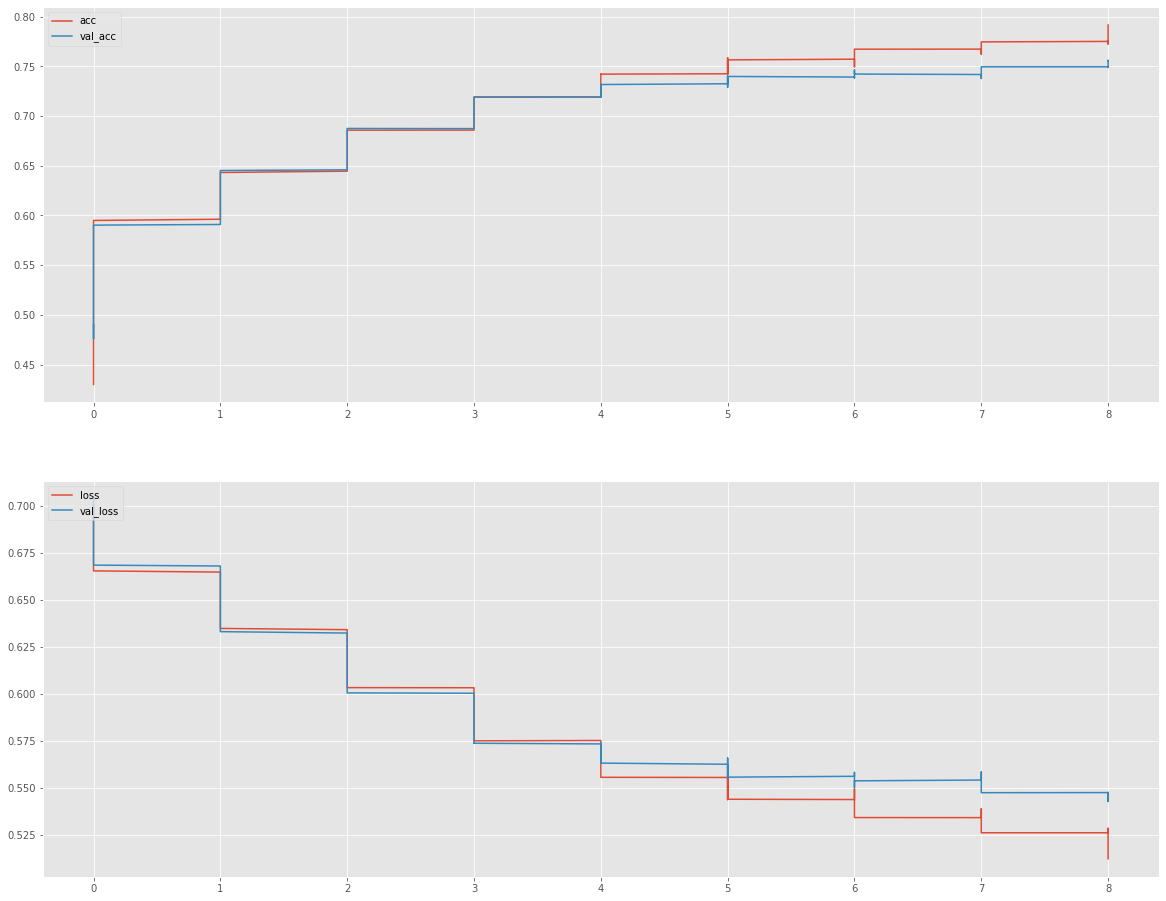

In [171]:
acc_loss_graph('/content/Model-1655237860.log')

In [172]:
correct = 0
total = 0

img = cv2.imread(f'/content/download (1).jpeg')

img = cv2.resize(img, (50, 50))
# img = np.array(img)
img = torch.Tensor(img)
with torch.no_grad():
    net_out = net(img.view(-1, 1, 50, 50).cuda())[0]
    predicted_class = torch.argmax(net_out)
    if predicted_class == 0:
        print("Cat")
    else:
      print("Dog")

Dog


In [121]:
contents = open('/content/Model-1655236523.log', "r").read().split('\n')

In [133]:
for c in contents:
    if model_name in c:
      name, time_stamp, acc, loss, val_acc, val_loss, epoch = c.split(',')
      print(float(epoch))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0


In [130]:
times

NameError: ignored